# Alois :: Distributions

**Objectives:**
* Plot distributions by Region and Age

In [1]:
import pandas as pd
import numpy as np

import os

* parquet folder for our merged DataFrame

In [2]:
parquet = '/media/tmo/data/work/datasets/02_ST/parquet/'
st_full = parquet + 'st_full'

In [3]:
slides = [
    'B02_D1', 'B02_E1', 'B03_C2', 'B03_D2', 'B04_D1',
    'B04_E1', 'B05_D2', 'B05_E2', 'B06_E1', 'B07_C2',
    'N02_C1', 'N02_D1', 'N03_C2', 'N03_D2', 'N04_D1',
    'N04_E1', 'N05_C2', 'N05_D2', 'N06_D2', 'N07_C1']

In [4]:
# SLIDE_META_COLUMNS = ['Sample id', 'GenotypeShort', 'Age (day)', 'Age (month)']
SLIDE_META_COLUMNS = ['sampleID', 'GT', 'age_days', 'age_months']

In [5]:
SPOT_META_COLUMNS = ['sampleID', 'AB1_StdDev_Yen', 'Region_predict',
                     'microglia', 'neuron', 'astrocyte', 'oligodendrocyte', 'endothelial', 'interneuron']

In [6]:
CELL_TYPES = SPOT_META_COLUMNS[3:]
CELL_TYPES

['microglia',
 'neuron',
 'astrocyte',
 'oligodendrocyte',
 'endothelial',
 'interneuron']

In [30]:
GT = 'GT'
YEN = 'AB1_StdDev_Yen'
REGION = 'Region_predict'

ASTROCYTE = 'astrocyte'
NEURON = 'neuron'
INTERNEURON = 'interneuron'

AGE = 'age'
DAYS = 'age_days'
MONTHS = 'age_months'

SAMPLE_ID = 'sampleID'
SPOT_UID = 'spot_UID'

---

# Analysis

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="whitegrid")

In [9]:
%%time
full = pd.read_parquet(st_full)

CPU times: user 8.57 s, sys: 12.5 s, total: 21 s
Wall time: 10.4 s


In [10]:
full.shape

(10327, 46757)

In [11]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10327 entries, 0 to 477
Columns: 46757 entries, spot_UID to age_months
dtypes: float32(46454), float64(234), int64(65), object(4)
memory usage: 1.8+ GB


* condense age into two classes: young and old

In [12]:
full['age']=np.where(full['age_months']<10, 'young', 'old')

In [13]:
full['age'].value_counts()

young    5307
old      5020
Name: age, dtype: int64

In [14]:
meta_df = full[SLIDE_META_COLUMNS + SPOT_META_COLUMNS + ['age']]
meta_df.head()

,sampleID,GT,age_days,age_months,sampleID,AB1_StdDev_Yen,Region_predict,microglia,neuron,astrocyte,oligodendrocyte,endothelial,interneuron,age
0,B02_D1,WT,107,4,B02_D1,0.0,AT_OLF,0.119315,0.032347,0.084108,-0.071774,0.015555,-0.098903,young
1,B02_D1,WT,107,4,B02_D1,0.0,AT_HY,0.075579,0.132762,0.076381,-0.016686,0.091661,0.286832,young
2,B02_D1,WT,107,4,B02_D1,0.0,AT_HY,0.066301,-0.015303,0.186733,-0.021227,0.063068,0.085310,young
3,B02_D1,WT,107,4,B02_D1,0.0,unknown,0.183595,0.060572,0.191472,0.075224,0.231584,0.311879,young
4,B02_D1,WT,107,4,B02_D1,0.0,AT_OLF,-0.050931,0.038941,0.116606,-0.091150,0.040463,-0.001418,young


## **AB1 StdDev Yen**

* only KI samples have a plaque vicinity > 0

In [15]:
meta_df[meta_df[YEN] > 0.0]['GT'].value_counts()

KI    5009
Name: GT, dtype: int64

In [16]:
meta_df['GT'].value_counts()

WT    5318
KI    5009
Name: GT, dtype: int64

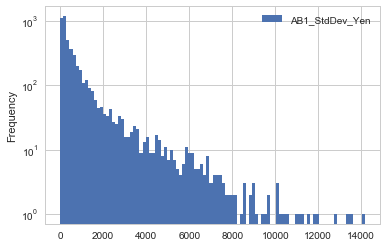

In [17]:
meta_df[meta_df[YEN] > 0.0][[YEN]].plot.hist(bins=100, 
                                             log=True)
plt.show()

In [18]:
meta_df['age_months'].value_counts()

4     4292
18    4085
6     1015
12     935
Name: age_months, dtype: int64

In [19]:
regions = meta_df[REGION].unique()
regions.sort()
regions

array(['AT_AUD', 'AT_CNU', 'AT_CTXsp', 'AT_ECT', 'AT_ENTI', 'AT_FB',
       'AT_FB_HY', 'AT_FB_TH', 'AT_HPd_CA1_slm', 'AT_HPd_CA1_so',
       'AT_HPd_CA1_sr', 'AT_HPd_CA2_slm', 'AT_HPd_CA2_so', 'AT_HPd_CA2_sr',
       'AT_HPd_CA3_slm', 'AT_HPd_CA3_slu', 'AT_HPd_CA3_so',
       'AT_HPd_CA3_sr', 'AT_HPd_DG_mo', 'AT_HPd_DG_po', 'AT_HPs_CA1_sp',
       'AT_HPs_CA2_sp', 'AT_HPs_CA3_sp', 'AT_HPs_DG_sp', 'AT_HY', 'AT_MB',
       'AT_OLF', 'AT_PERI', 'AT_PTL', 'AT_RSP', 'AT_SSp', 'AT_TE', 'AT_TH',
       'AT_VL', 'unknown'], dtype=object)

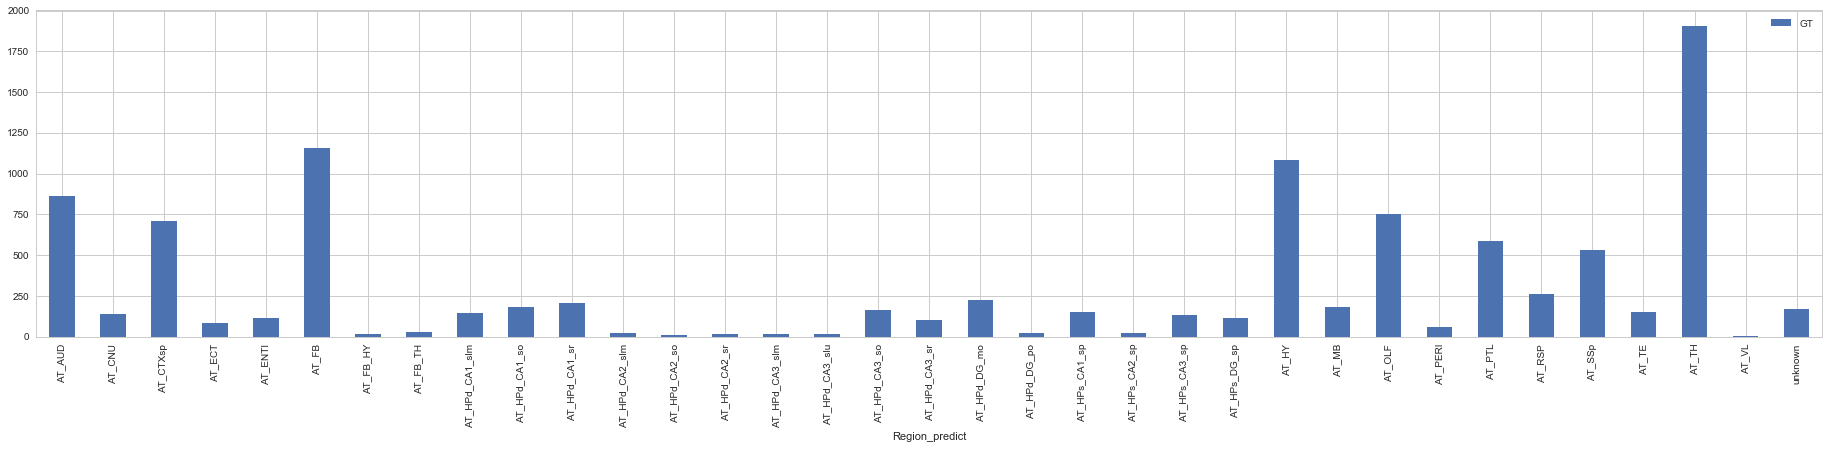

In [20]:
meta_df[[REGION, GT]].groupby(REGION).count().plot(kind='bar', figsize=(32,6))
plt.show()

## **Plaque pixel intensity StdDev Yen**

### **By age (months)**

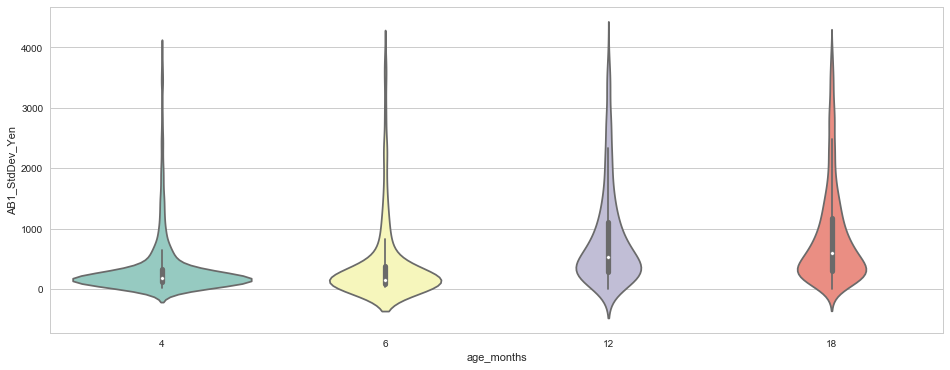

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))

# ax.set(yscale="log")
data = meta_df[(meta_df['GT'] == 'KI') & (meta_df[YEN] < 4000)][[YEN, MONTHS]]
sns.violinplot(data=data, x='age_months', y=YEN, palette="Set3")

plt.show()

### **AB1 (StdDev Yen) By Region / Age in KI**

* https://stackoverflow.com/questions/40514921/ordering-boxplot-x-axis-in-seaborn

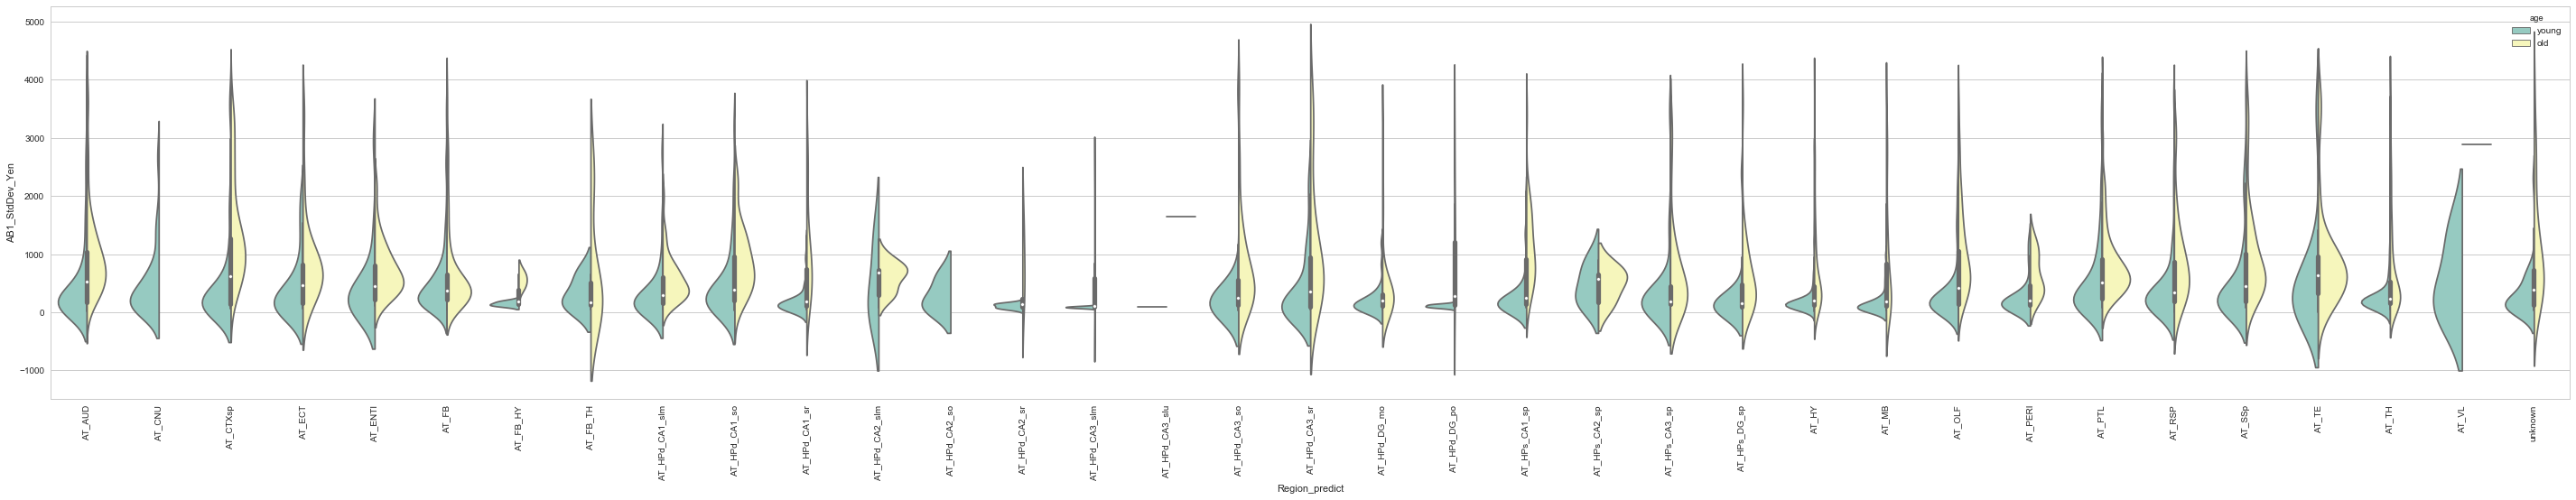

In [22]:
fig, ax = plt.subplots(figsize=(50, 8))

data = meta_df[(meta_df['GT'] == 'KI') & (meta_df[YEN] < 4000)][[YEN, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=YEN, hue=AGE, palette="Set3", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

plt.show()

### **Cell type count distributions**

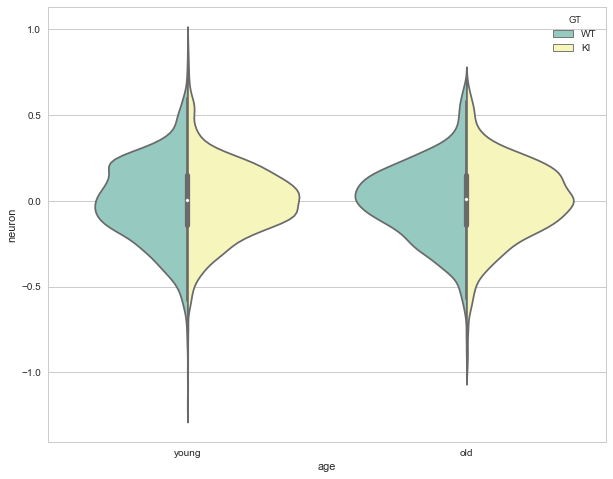

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

cell_type = NEURON

data = meta_df[[cell_type, MONTHS, REGION, AGE, GT]]
g = sns.violinplot(data=data, x=AGE, y=cell_type, hue=GT, palette="Set3", split=True)
# g.set_xticklabels(rotation=90, labels=regions)

plt.show()

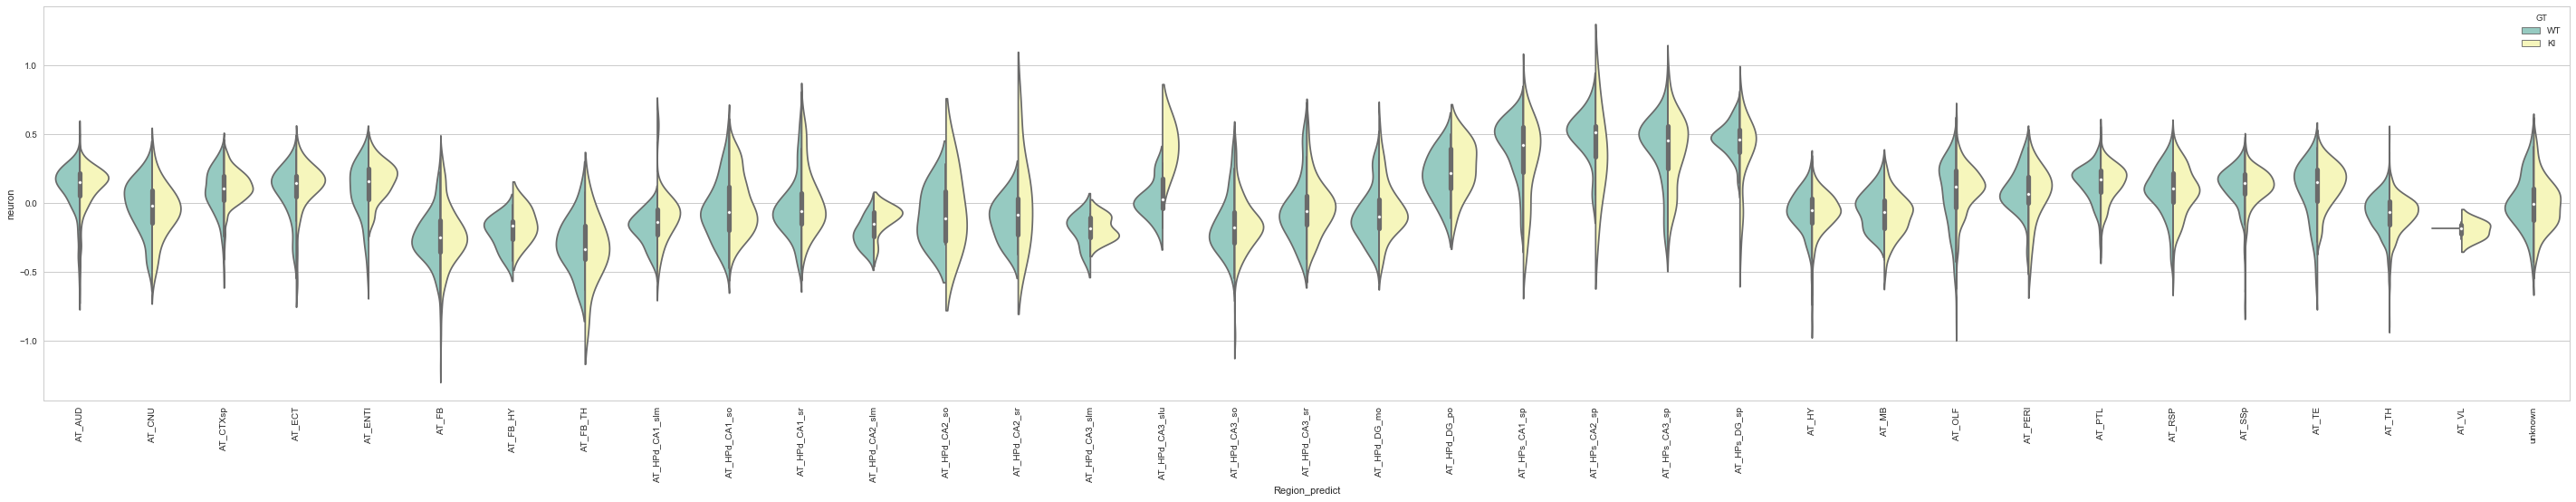

In [24]:
fig, ax = plt.subplots(figsize=(50, 8))

cell_type = NEURON

data = meta_df[[cell_type, MONTHS, REGION, AGE, GT]]
g = sns.violinplot(data=data, x=REGION, y=cell_type, hue=GT, palette="Set3", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

plt.show()

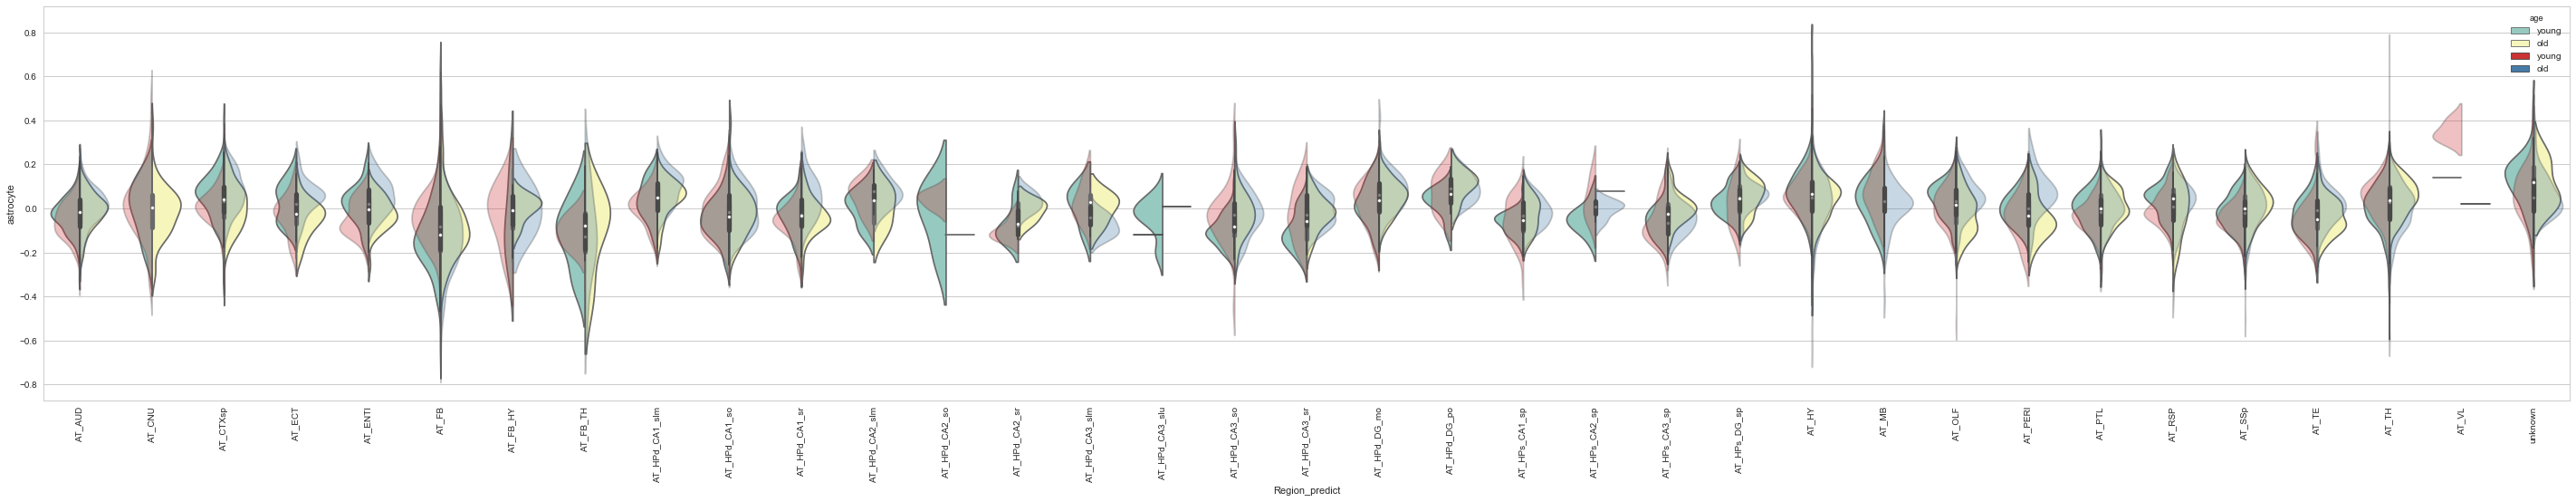

In [25]:
fig, ax = plt.subplots(figsize=(50, 8))

cell_type = ASTROCYTE

data = meta_df[(meta_df['GT'] == 'WT')][[cell_type, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=cell_type, hue=AGE, palette="Set3", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

data = meta_df[(meta_df['GT'] == 'KI')][[cell_type, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=cell_type, hue=AGE, palette="Set1", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

n_collections = len(ax.collections)

n = int(n_collections/2)-1

for c in ax.collections[n:]:
    c.set_alpha(0.3)

plt.show()

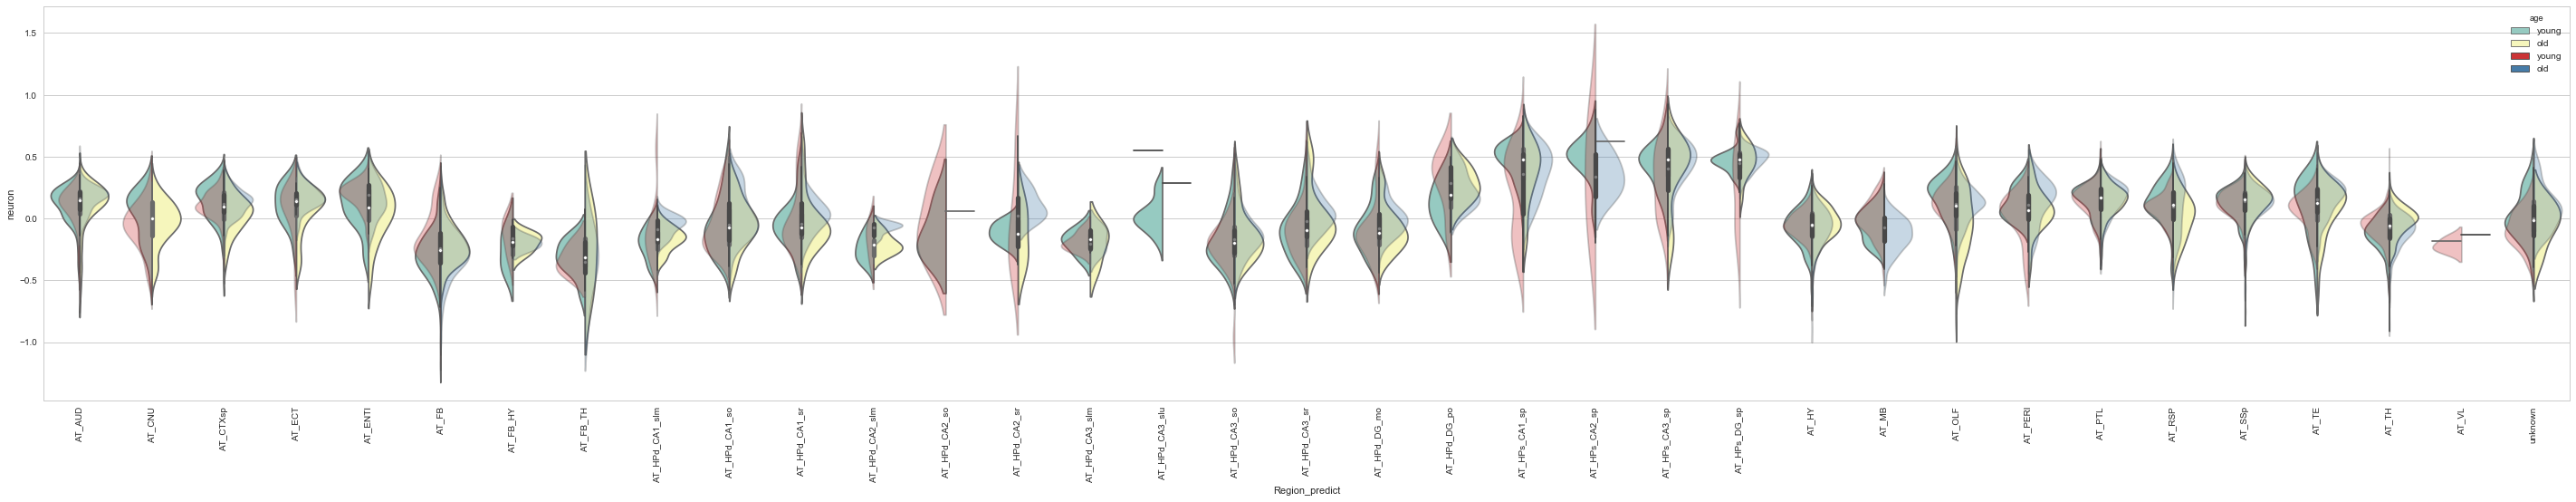

In [26]:
fig, ax = plt.subplots(figsize=(50, 8))

cell_type = NEURON

data = meta_df[(meta_df['GT'] == 'WT')][[cell_type, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=cell_type, hue=AGE, palette="Set3", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

data = meta_df[(meta_df['GT'] == 'KI')][[cell_type, MONTHS, REGION, AGE]]
g = sns.violinplot(data=data, x=REGION, y=cell_type, hue=AGE, palette="Set1", order=regions, split=True)
g.set_xticklabels(rotation=90, labels=regions)

n_collections = len(ax.collections)

n = int(n_collections/2)-1

for c in ax.collections[n:]:
    c.set_alpha(0.3)

plt.show()

In [27]:
len(ax.collections)

190

In [28]:
from sklearn.model_selection import train_test_split

X = full[[ASTROCYTE]]

#train_test_split(full[[GT, AGE, REGION]], test_size=0.2, stra)

# full[[GT, AGE]]

In [31]:
full[[SAMPLE_ID, SPOT_UID]]

,sampleID,spot_UID
0,B02_D1,B02_D1__11_2
1,B02_D1,B02_D1__27_2
2,B02_D1,B02_D1__26_2
3,B02_D1,B02_D1__30_2
4,B02_D1,B02_D1__12_2
5,B02_D1,B02_D1__28_2
6,B02_D1,B02_D1__14_2
7,B02_D1,B02_D1__13_2
8,B02_D1,B02_D1__25_2
9,B02_D1,B02_D1__11_3
